### Load IRIS dataset ###

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import numpy as np

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

### Describe the dataset ###

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Print the dataset (head and tail) ###

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


### Plot histogram of target vector ###

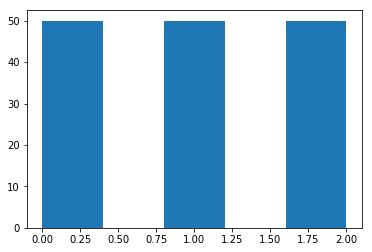

In [6]:
plt.hist(iris.target, bins=5)
plt.show()

### Split the dataset into test and train datasets ###

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.7, 
                                                    random_state=123456, stratify=iris.target)

/Users/ramesh.iyer/Documents/ml4t/assignments/ml4t/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Plot target variable distribution for training dataset ###

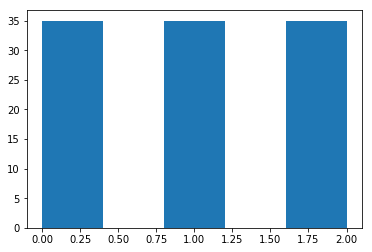

In [8]:
plt.hist(y_train, bins=5)
plt.show()

### Plot target variable distribution for test dataset ###

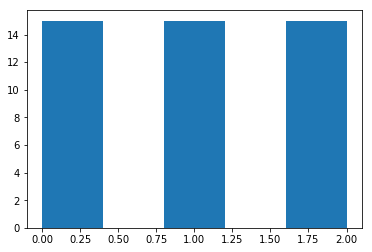

In [9]:
plt.hist(y_test, bins=5)
plt.show()

### Some utils to make plots great again ###

In [10]:
from sklearn.model_selection import learning_curve, validation_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    classes.sort()
    plt.figure()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt

## Decision Trees ##

Now we have training and test dataset. Let's generate some validation curves using Decision Trees !!

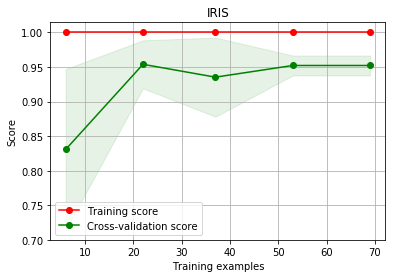

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

clf = DecisionTreeClassifier()
cv = StratifiedKFold(shuffle=True, random_state=123456)
p = plot_learning_curve(clf, "IRIS Decision Trees", X_train, y_train)
p.show()

Let's see how good our model performs on the test dataset

Normalized confusion matrix
[[ 1.          0.          0.        ]
 [ 0.          1.          0.        ]
 [ 0.          0.13333333  0.86666667]]
F1 Score: 0.955357142857
Accuracy: 0.955555555556


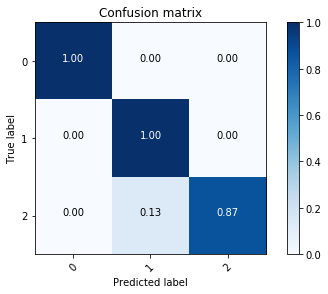

In [18]:
from sklearn.metrics import (make_scorer, mean_squared_error, accuracy_score,
    f1_score, roc_auc_score, confusion_matrix)
from sklearn.utils import resample, compute_sample_weight
import itertools


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, [0,1,2], "IRIS")
print "F1 Score: {}".format(f1_score(y_test, y_pred, average="weighted"))
print "Accuracy: {}".format(accuracy_score(y_test, y_pred))


## Random Forest ##

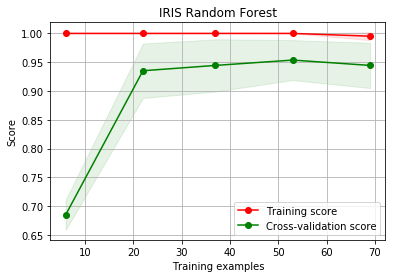

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
cv = StratifiedKFold(shuffle=True, random_state=123456)
p = plot_learning_curve(clf, "IRIS Random Forest", X_train, y_train)
p.show()

Normalized confusion matrix
[[ 1.   0.   0. ]
 [ 0.   1.   0. ]
 [ 0.   0.2  0.8]]
F1 Score: 0.93265993266
Accuracy: 0.933333333333


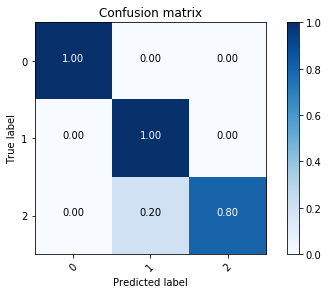

In [23]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, [0,1,2], "IRIS")
print "F1 Score: {}".format(f1_score(y_test, y_pred, average="weighted"))
print "Accuracy: {}".format(accuracy_score(y_test, y_pred))

## Support Vector Machines ##

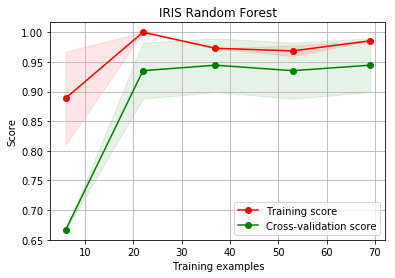

In [24]:
from sklearn.svm import SVC

clf = SVC()
cv = StratifiedKFold(shuffle=True, random_state=123456)
p = plot_learning_curve(clf, "IRIS SVM", X_train, y_train)
p.show()

Normalized confusion matrix
[[ 1.   0.   0. ]
 [ 0.   1.   0. ]
 [ 0.   0.2  0.8]]
F1 Score: 0.93265993266
Accuracy: 0.933333333333


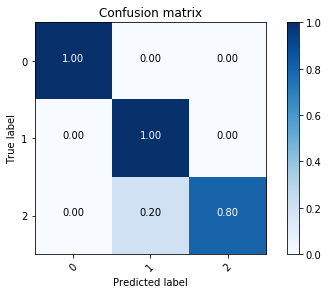

In [25]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, [0,1,2], "IRIS")
print "F1 Score: {}".format(f1_score(y_test, y_pred, average="weighted"))
print "Accuracy: {}".format(accuracy_score(y_test, y_pred))